## ASSIGNMENT - 7.2
## REFERRAL ID - SIRSS2109

### First, let's import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the csv file for analysis

In [2]:
df_train = pd.read_csv('H_train.csv')
df_test = pd.read_csv('H_test.csv')

In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_test.shape

(1459, 80)

In [7]:
df_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
sol = df_test['Id']

In [10]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### DATA PREPROCESSING

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

In [14]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [16]:
df_train.drop(['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt'],axis = 1,inplace=True)

In [17]:
df_test.drop(['PoolQC','Fence','MiscFeature','Alley','GarageYrBlt'],axis = 1,inplace=True)

In [18]:
avg_lot = df_train['LotFrontage'].mean()
df_train['LotFrontage'].replace(np.nan,avg_lot,inplace = True)

In [19]:
avg_lot = df_test['LotFrontage'].mean()
df_test['LotFrontage'].replace(np.nan,avg_lot,inplace = True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
df_train['MasVnrType'].replace(np.nan,df_train['MasVnrType'].mode()[0],inplace = True)
df_train['MasVnrArea'].replace(np.nan,df_train['MasVnrArea'].mode()[0],inplace = True)
df_train['BsmtQual'].replace(np.nan,df_train['BsmtQual'].mode()[0],inplace = True)
df_train['BsmtCond'].replace(np.nan,df_train['BsmtCond'].mode()[0],inplace = True)
df_train['BsmtExposure'].replace(np.nan,df_train['BsmtExposure'].mode()[0],inplace = True)
df_train['BsmtFinType1'].replace(np.nan,df_train['BsmtFinType1'].mode()[0],inplace = True)
df_train['BsmtFinType2'].replace(np.nan,df_train['BsmtFinType2'].mode()[0],inplace = True)
df_train['FireplaceQu'].replace(np.nan, df_train['FireplaceQu'].mode()[0], inplace = True)
df_train['Electrical'].replace(np.nan,df_train['Electrical'].mode()[0],inplace = True)
df_train['GarageType'].replace(np.nan,df_train['GarageType'].mode()[0],inplace = True)
df_train['GarageFinish'].replace(np.nan,df_train['GarageFinish'].mode()[0],inplace = True)
df_train['GarageQual'].replace(np.nan,df_train['GarageQual'].mode()[0],inplace = True)
df_train['GarageCond'].replace(np.nan,df_train['GarageCond'].mode()[0],inplace = True)
df_train['GarageCond'].replace(np.nan,df_train['GarageCond'].mode()[0],inplace = True)
df_train['GarageCond'].replace(np.nan,df_train['GarageCond'].mode()[0],inplace = True)

In [22]:
df_test['MasVnrType'].replace(np.nan,df_test['MasVnrType'].mode()[0],inplace = True)
df_test['MasVnrArea'].replace(np.nan,df_test['MasVnrArea'].mean,inplace = True)
df_test['BsmtQual'].replace(np.nan,df_test['BsmtQual'].mode()[0],inplace = True)
df_test['BsmtCond'].replace(np.nan,df_test['BsmtCond'].mode()[0],inplace = True)
df_test['BsmtExposure'].replace(np.nan,df_test['BsmtExposure'].mode()[0],inplace = True)
df_test['BsmtFinType1'].replace(np.nan,df_test['BsmtFinType1'].mode()[0],inplace = True)
df_test['BsmtFinType2'].replace(np.nan,df_test['BsmtFinType2'].mode()[0],inplace = True)
df_train['FireplaceQu'].replace(np.nan, df_train['FireplaceQu'].mode()[0], inplace = True)
df_test['Electrical'].replace(np.nan,df_test['Electrical'].mode()[0],inplace = True)
df_test['GarageType'].replace(np.nan,df_test['GarageType'].mode()[0],inplace = True)
df_test['GarageFinish'].replace(np.nan,df_test['GarageFinish'].mode()[0],inplace = True)
df_test['GarageQual'].replace(np.nan,df_test['GarageQual'].mode()[0],inplace = True)
df_test['GarageCond'].replace(np.nan,df_test['GarageCond'].mode()[0],inplace = True)
df_test['GarageCond'].replace(np.nan,df_test['GarageCond'].mode()[0],inplace = True)
df_test['GarageCond'].replace(np.nan,df_test['GarageCond'].mode()[0],inplace = True)
df_test['SaleType'].replace(np.nan,df_test['SaleType'].mode()[0],inplace = True)

In [23]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [24]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

In [25]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


### EXPLORATORY DATA ANALYSIS

([<matplotlib.axis.YTick at 0x202d8450b20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

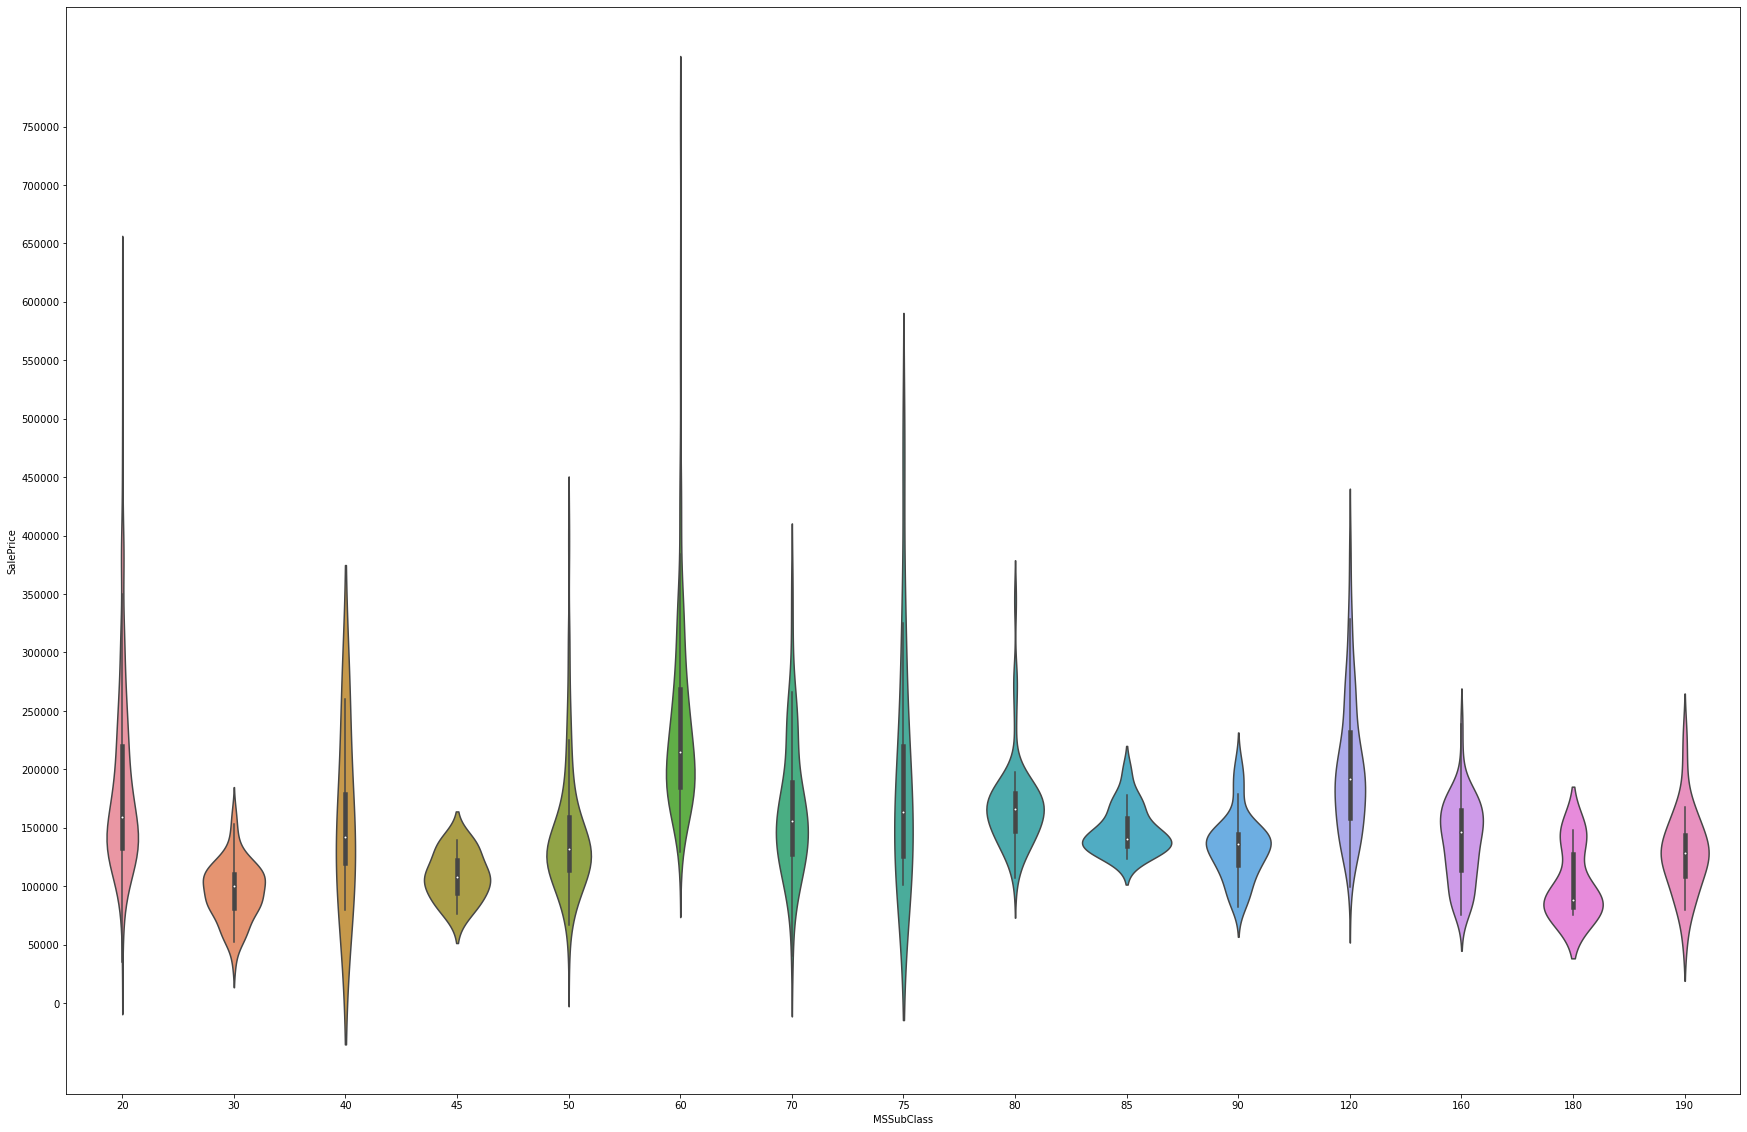

In [26]:
plt.figure(figsize=(30,20))
sns.violinplot(x='MSSubClass',y='SalePrice',data = df_train)
plt.yticks(np.arange(0,800000,50000))

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

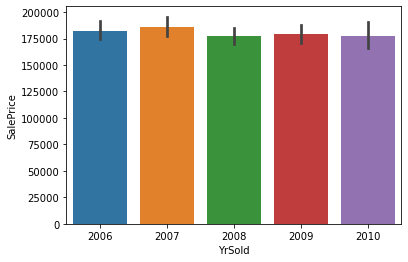

In [27]:
sns.barplot(x='YrSold',y='SalePrice',data = df_train)

In [28]:
df_train['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

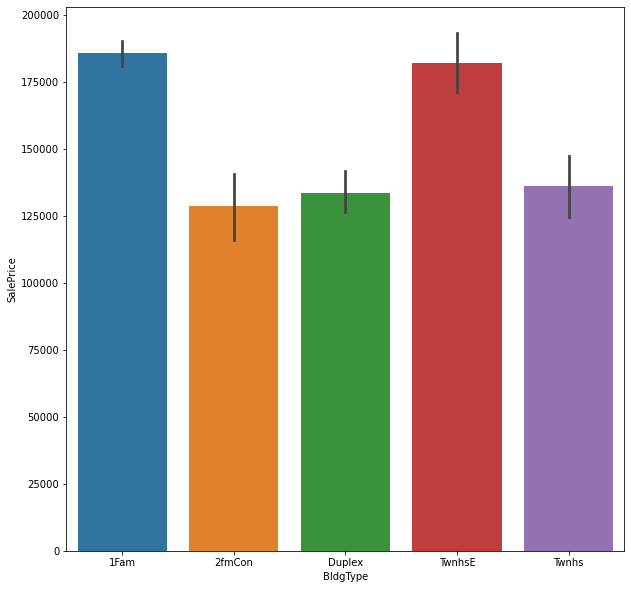

In [29]:
plt.figure(figsize = (10, 10))
sns.barplot(df_train['BldgType'], df_train['SalePrice'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

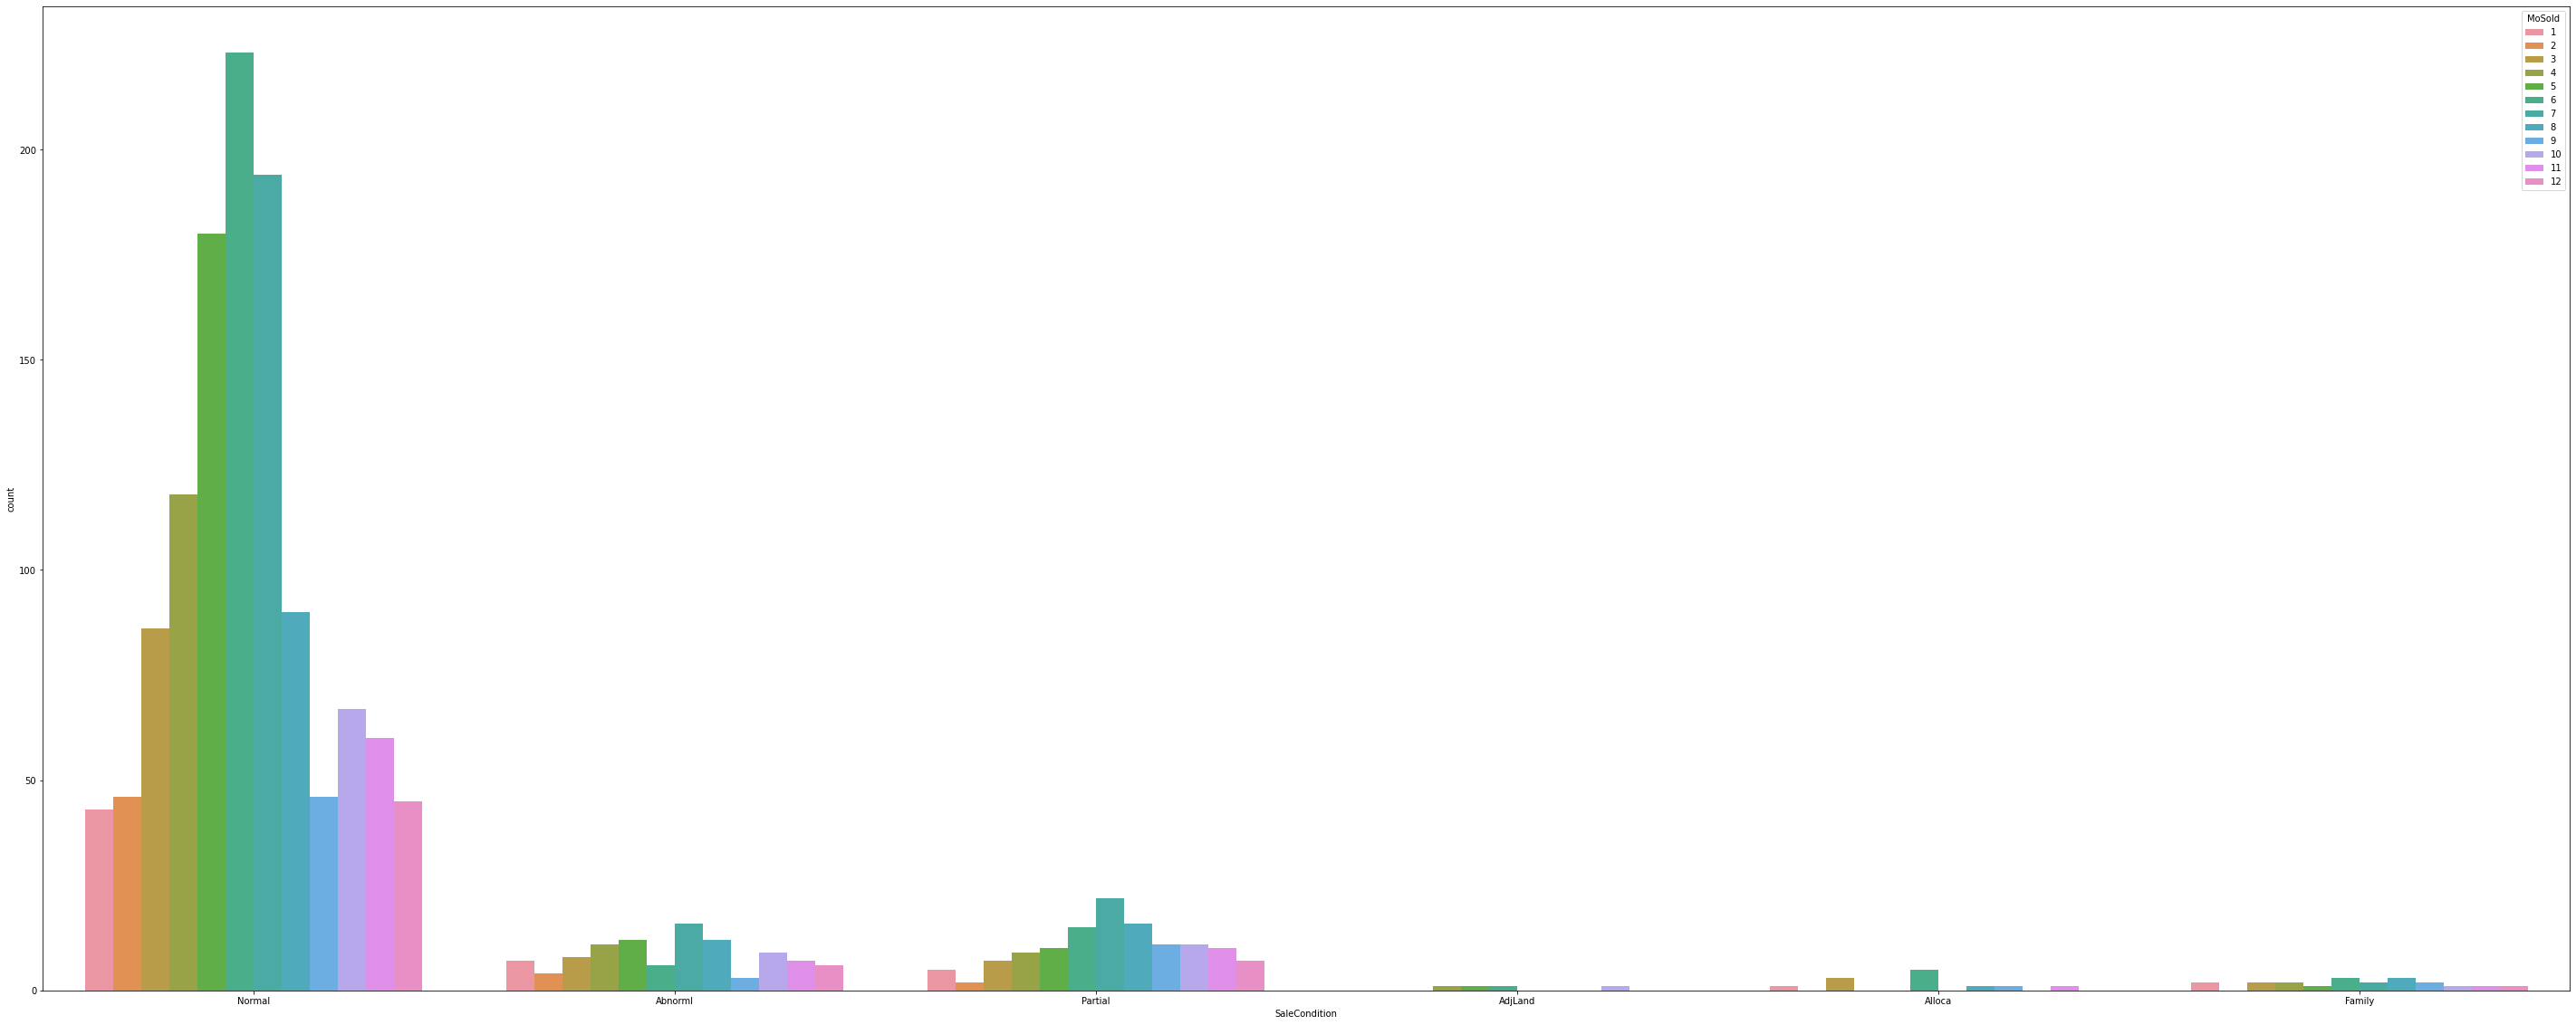

In [30]:
plt.figure(figsize=(50,20))
sns.countplot(df_train['SaleCondition'],hue='MoSold',data = df_train)

Text(0.5, 1.0, 'Distribution of Sale Price of House')

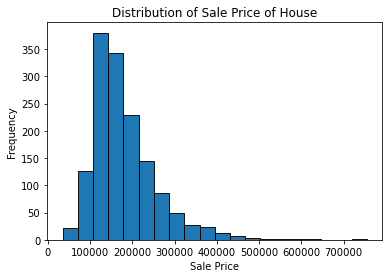

In [31]:
plt.hist(df_train["SalePrice"], 20, lw = 0.89, ec = 'black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price of House')

Text(0.5, 1.0, 'Distribution of Sale Type of House')

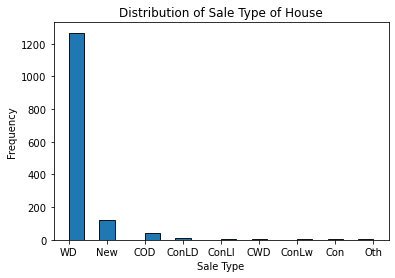

In [32]:
plt.hist(df_train["SaleType"], 20, lw = 0.89, ec = 'black')
plt.xlabel('Sale Type')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Type of House')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

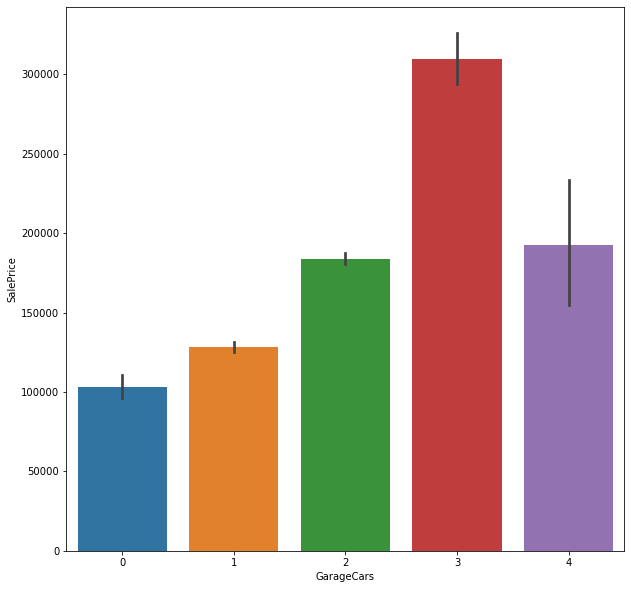

In [33]:
plt.figure(figsize = (10, 10))
sns.barplot(df_train['GarageCars'], df_train['SalePrice'])

<Figure size 2880x1440 with 0 Axes>

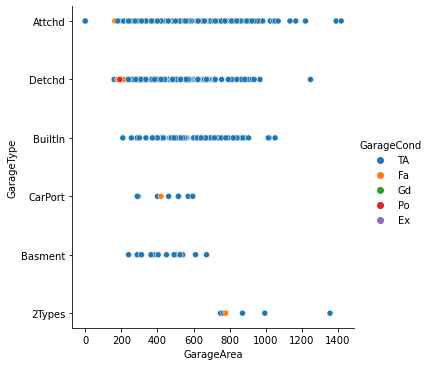

In [34]:
plt.figure(figsize=(40,20))
sns.relplot(x='GarageArea',y='GarageType',hue='GarageCond',data = df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

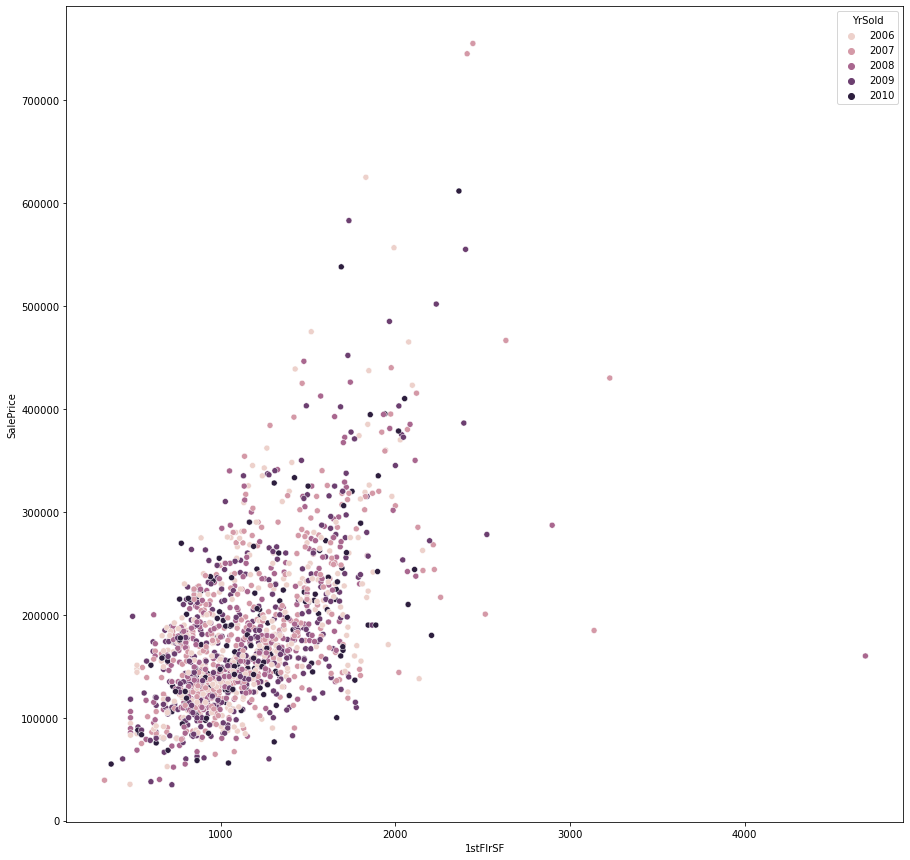

In [35]:
plt.figure(figsize = (15, 15))
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', hue = 'YrSold', data = df_train)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

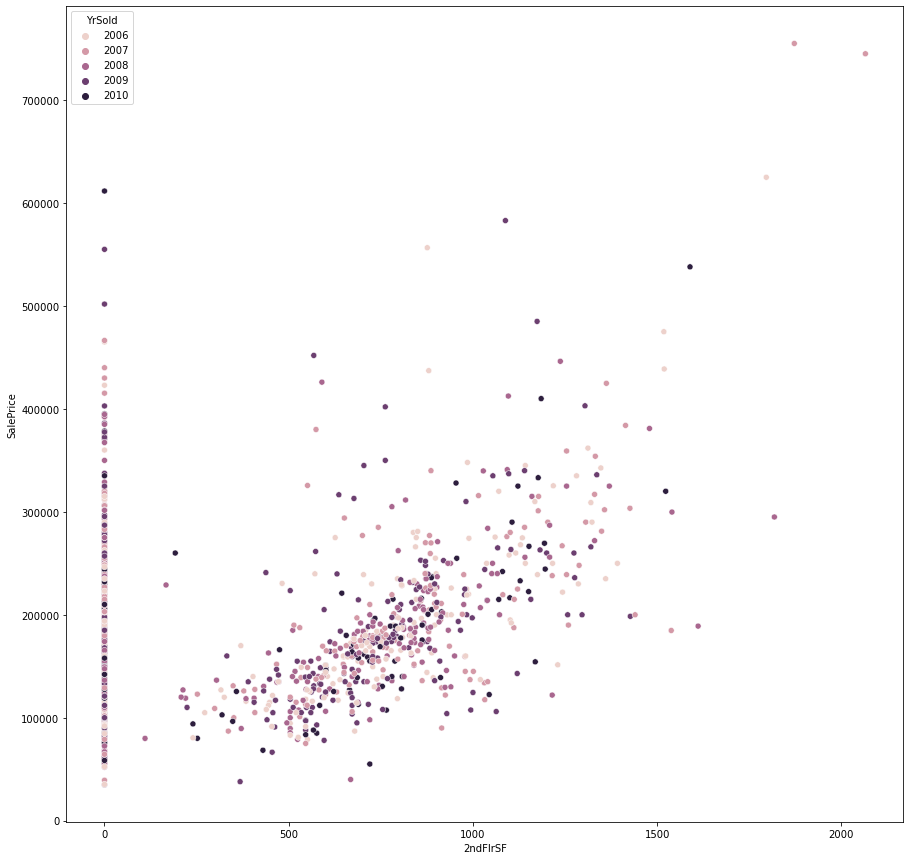

In [36]:
plt.figure(figsize = (15, 15))
sns.scatterplot(x = '2ndFlrSF', y = 'SalePrice', hue = 'YrSold', data = df_train)

In [37]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot:>

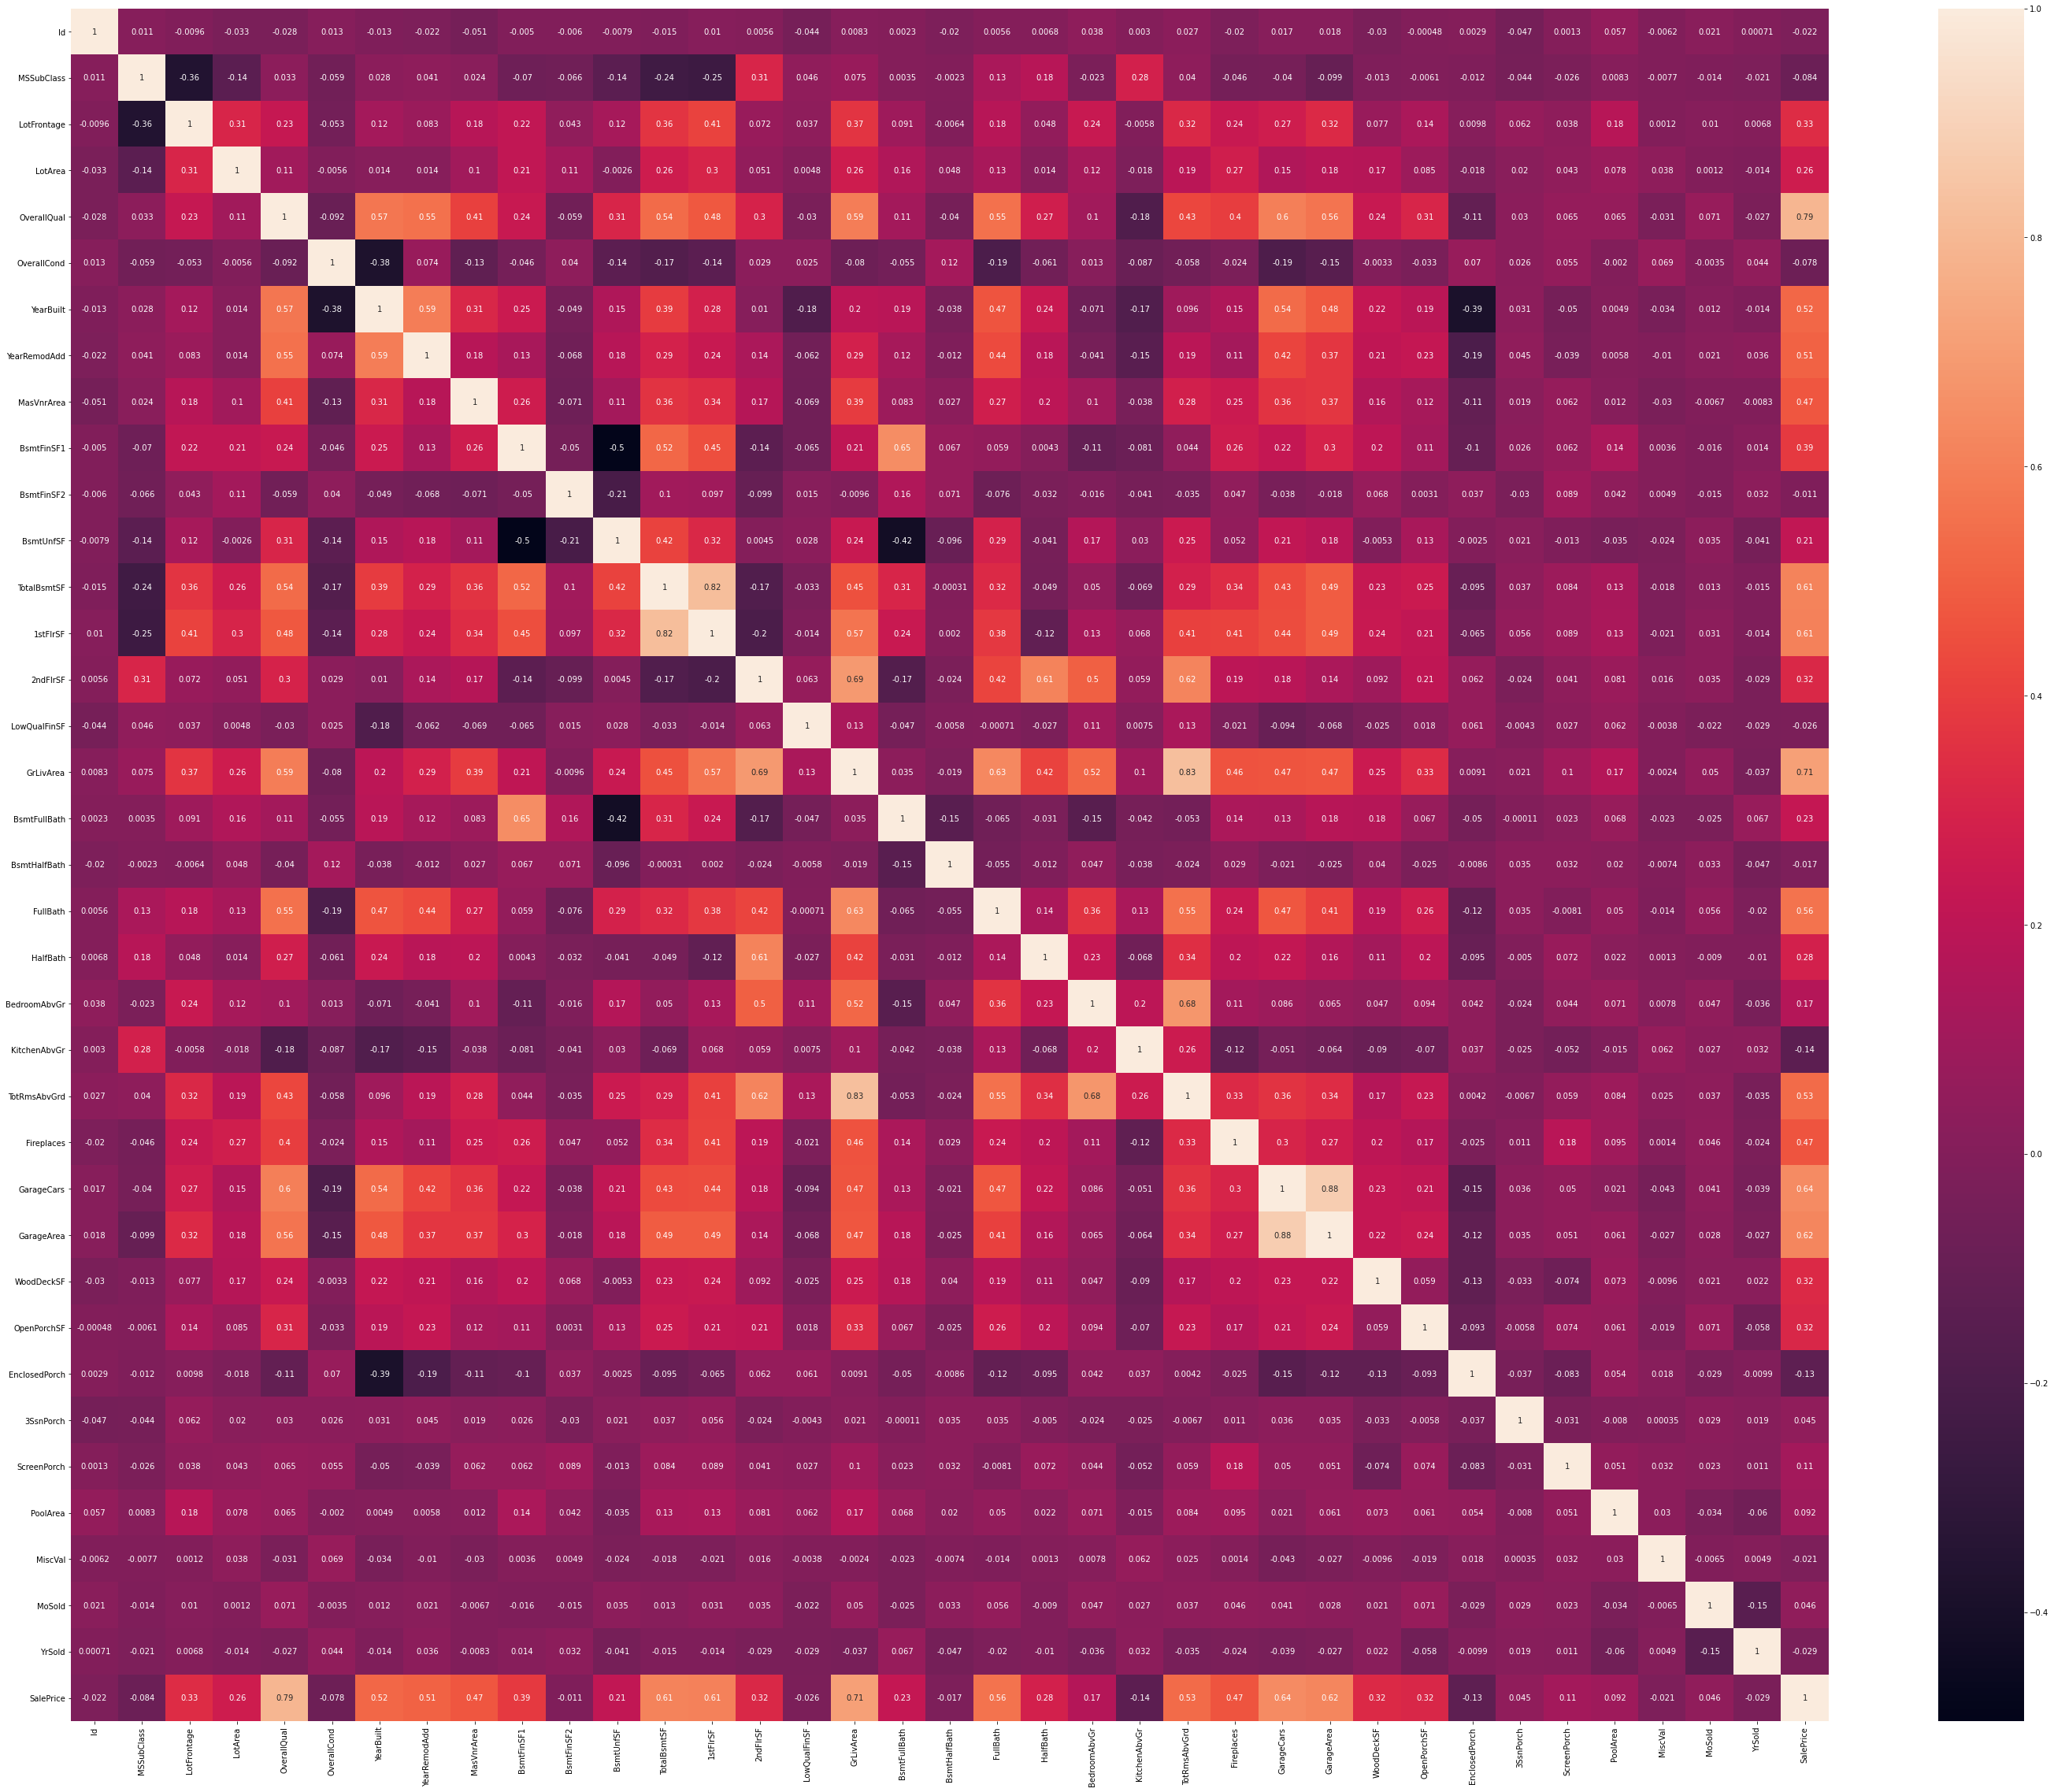

In [38]:
plt.figure(figsize=(50,40))
sns.heatmap(df_train.corr(),annot = True)

<Figure size 1440x720 with 0 Axes>

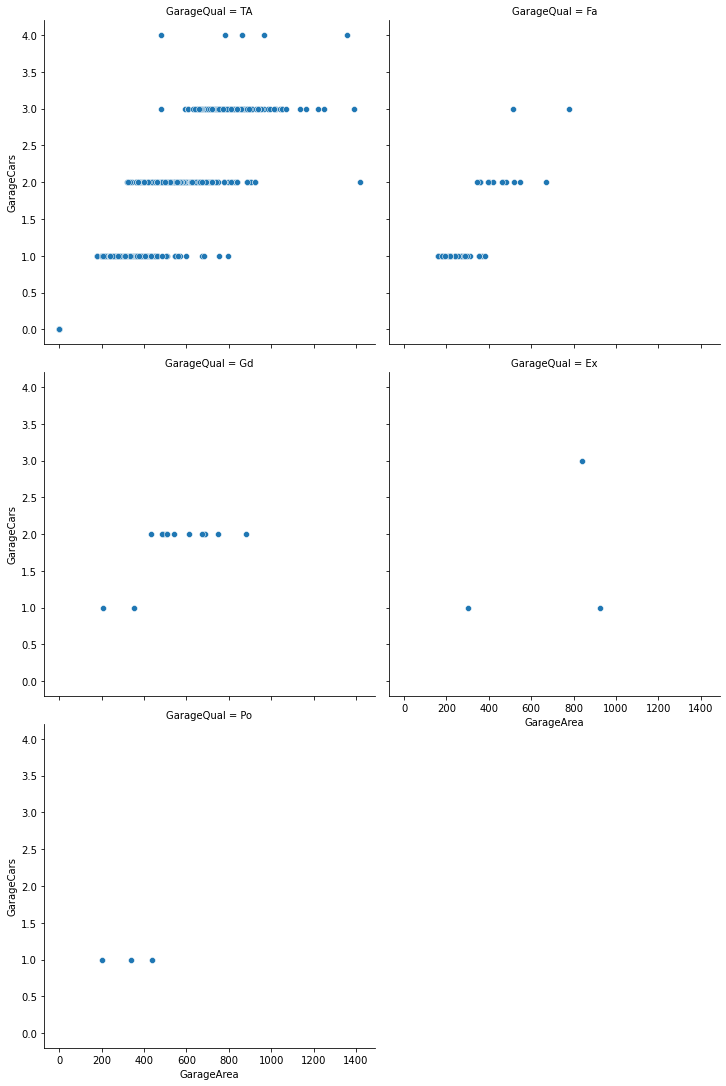

In [39]:
plt.figure(figsize=(20,10))
sns.relplot(x='GarageArea',y='GarageCars',col='GarageQual',data = df_train,col_wrap = 2)

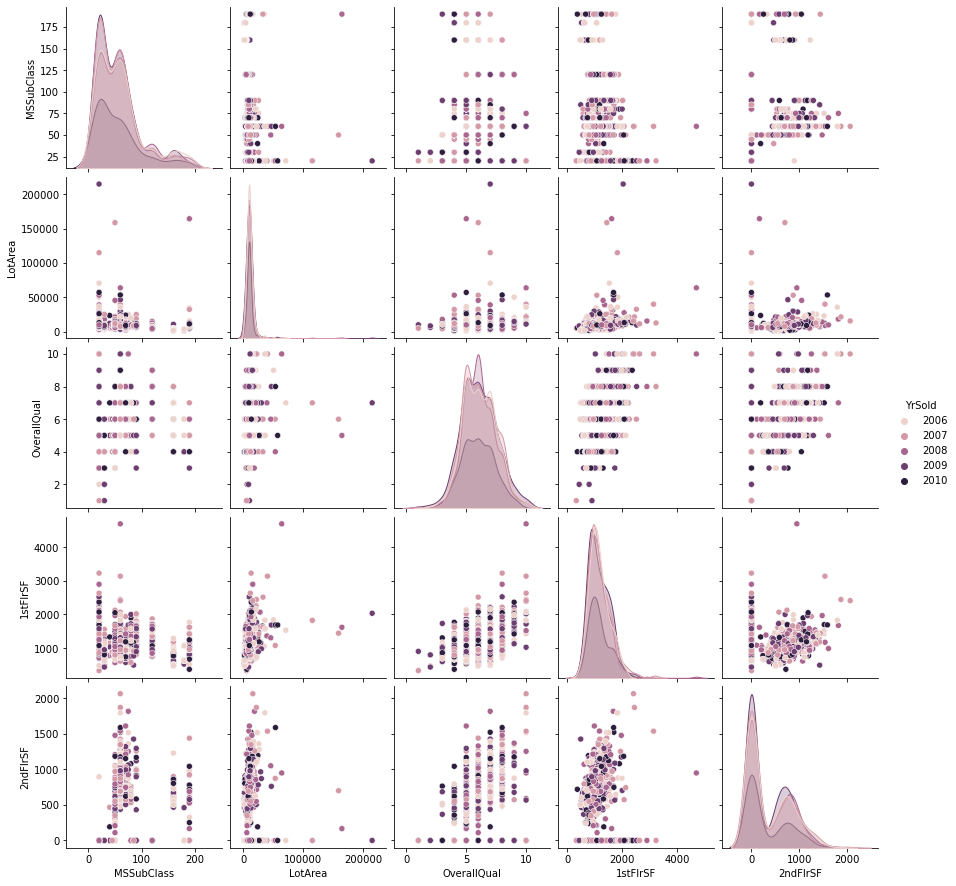

In [40]:
sns.pairplot(data = df_train , vars = ['MSSubClass', 'LotArea', 'OverallQual', '1stFlrSF', '2ndFlrSF'], hue = 'YrSold')

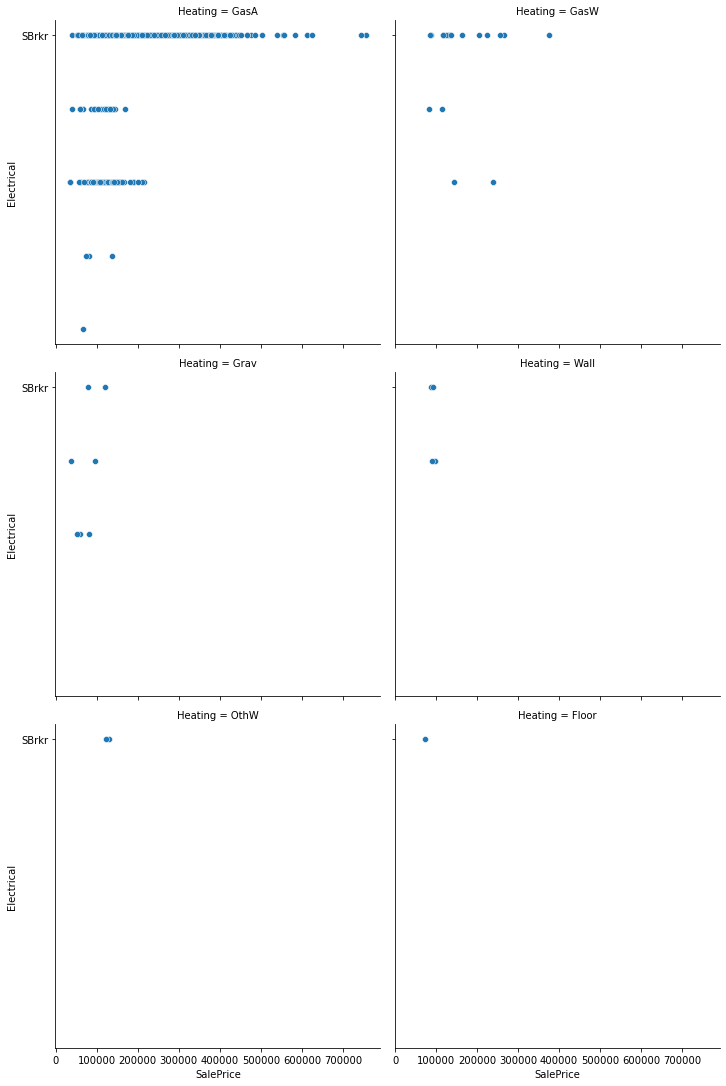

In [41]:
sns.relplot(x='SalePrice',y='Electrical',col='Heating',data=df_train,col_wrap=2)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

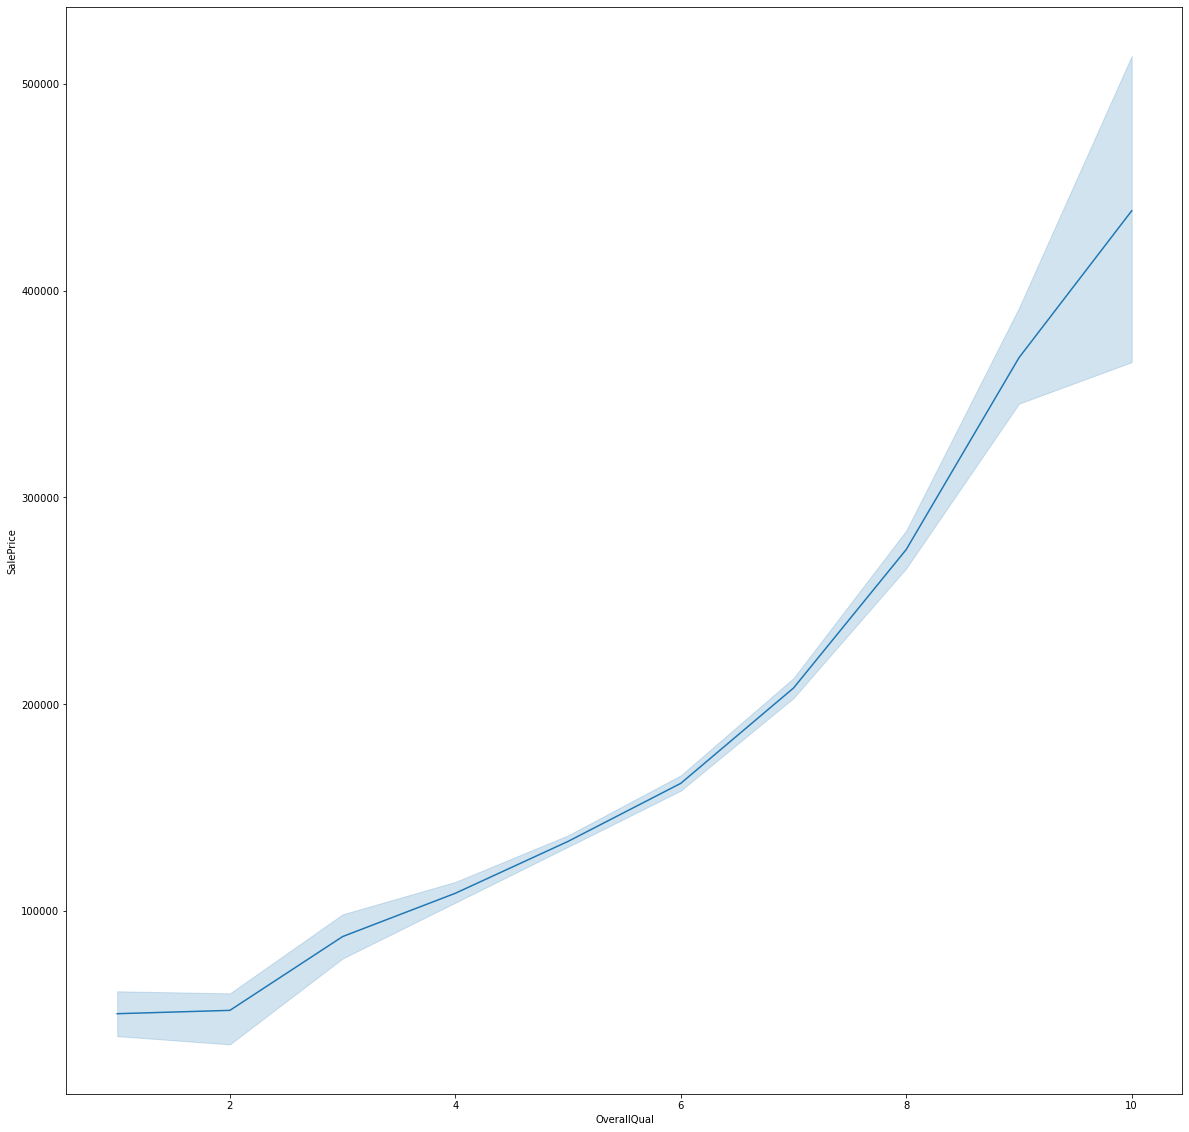

In [42]:
plt.figure(figsize = (20, 20))
sns.lineplot(x = 'OverallQual', y = 'SalePrice', dashes = False, data = df_train)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

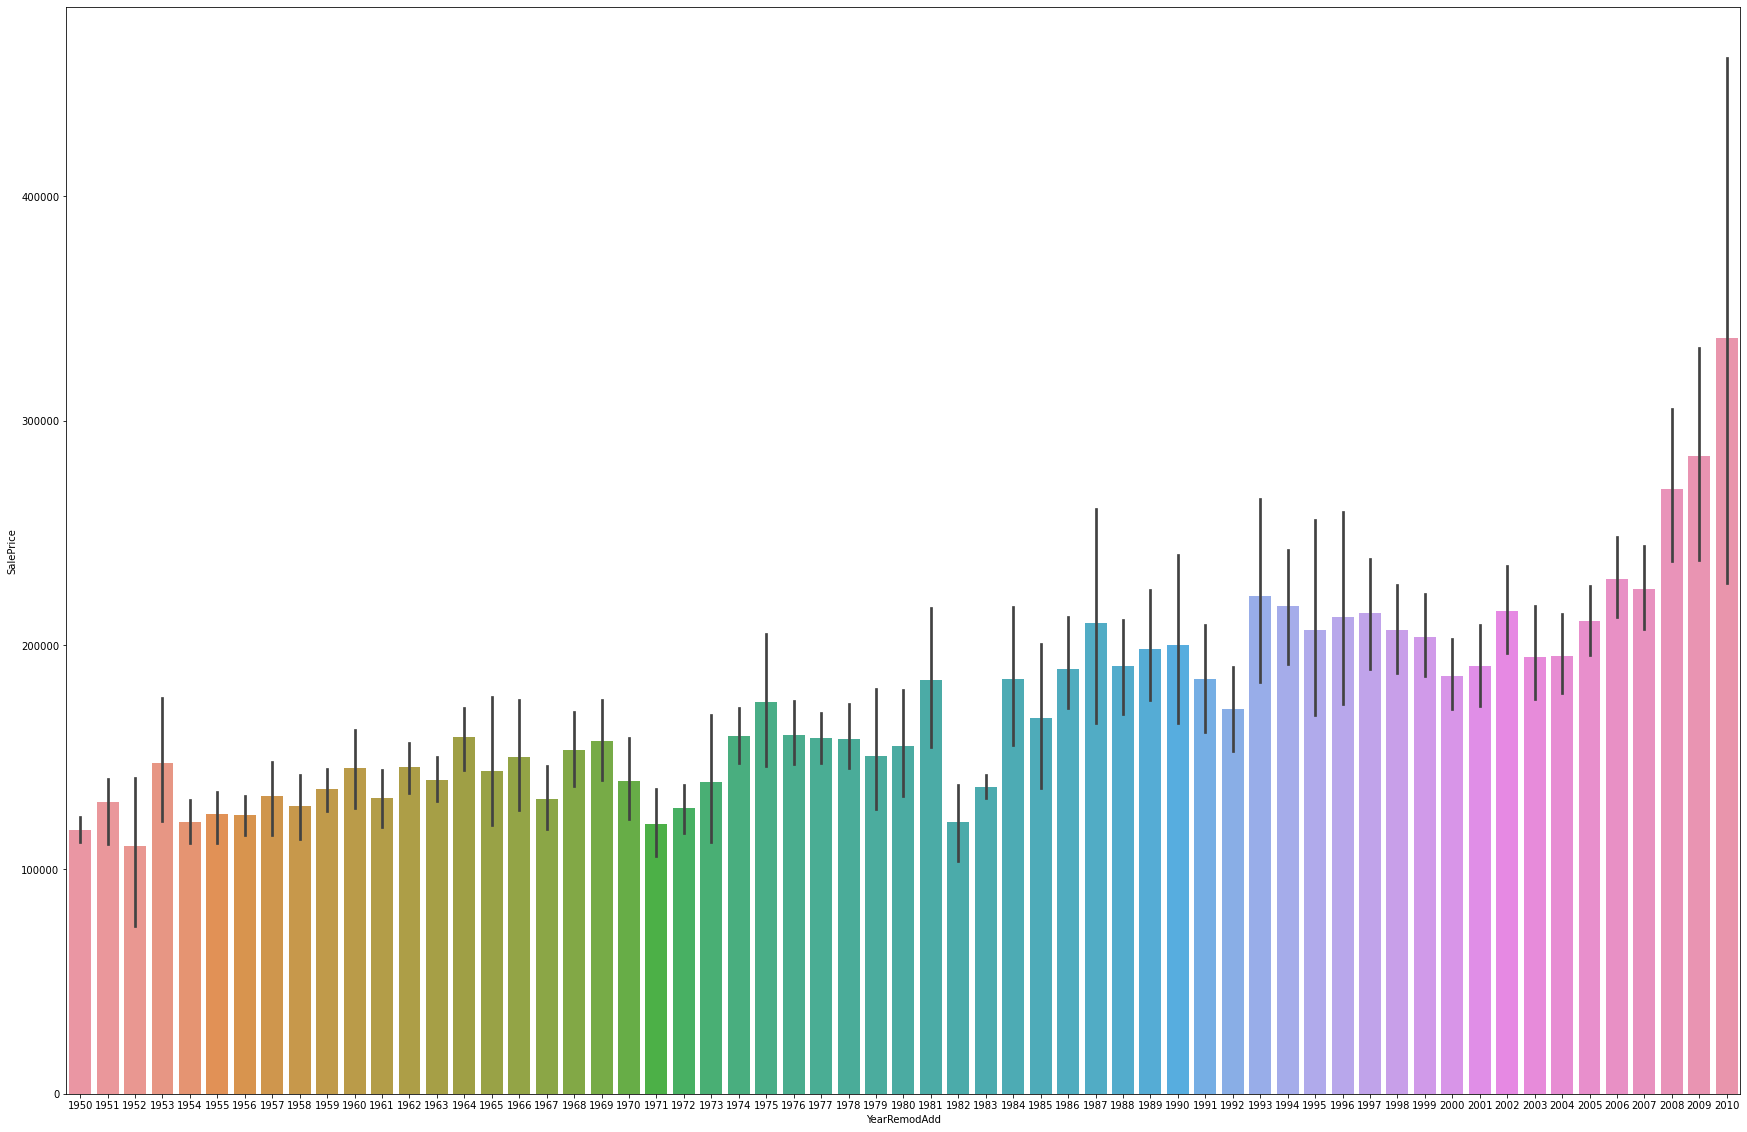

In [43]:
plt.figure(figsize=(30,20))
sns.barplot(x='YearRemodAdd',y='SalePrice',data = df_train)

([<matplotlib.axis.XTick at 0x202dedaadc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

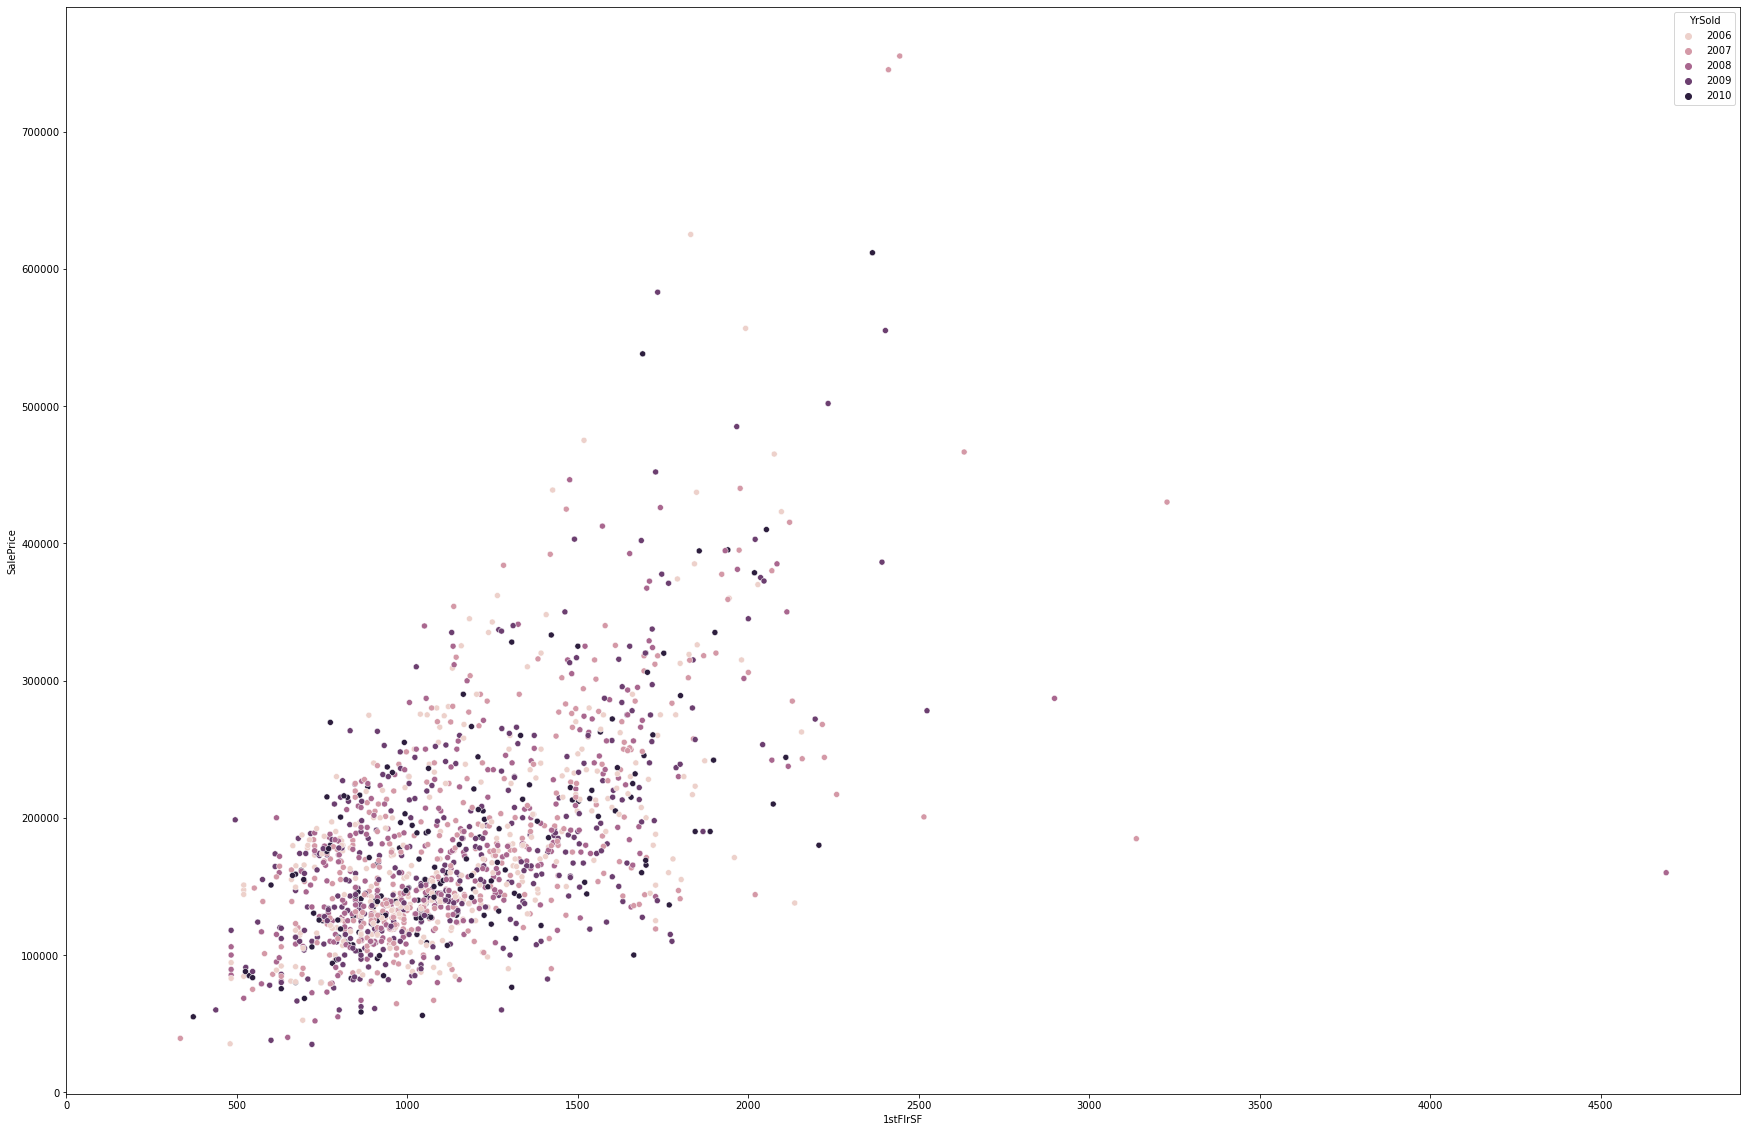

In [44]:
plt.figure(figsize=(30,20))
sns.scatterplot(x='1stFlrSF',y='SalePrice',hue='YrSold',data = df_train)
plt.xticks(np.arange(0,5000,500))

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

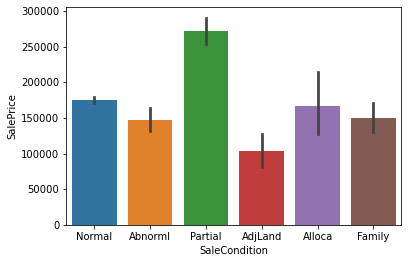

In [45]:
sns.barplot(x='SaleCondition',y='SalePrice',data =df_train)

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

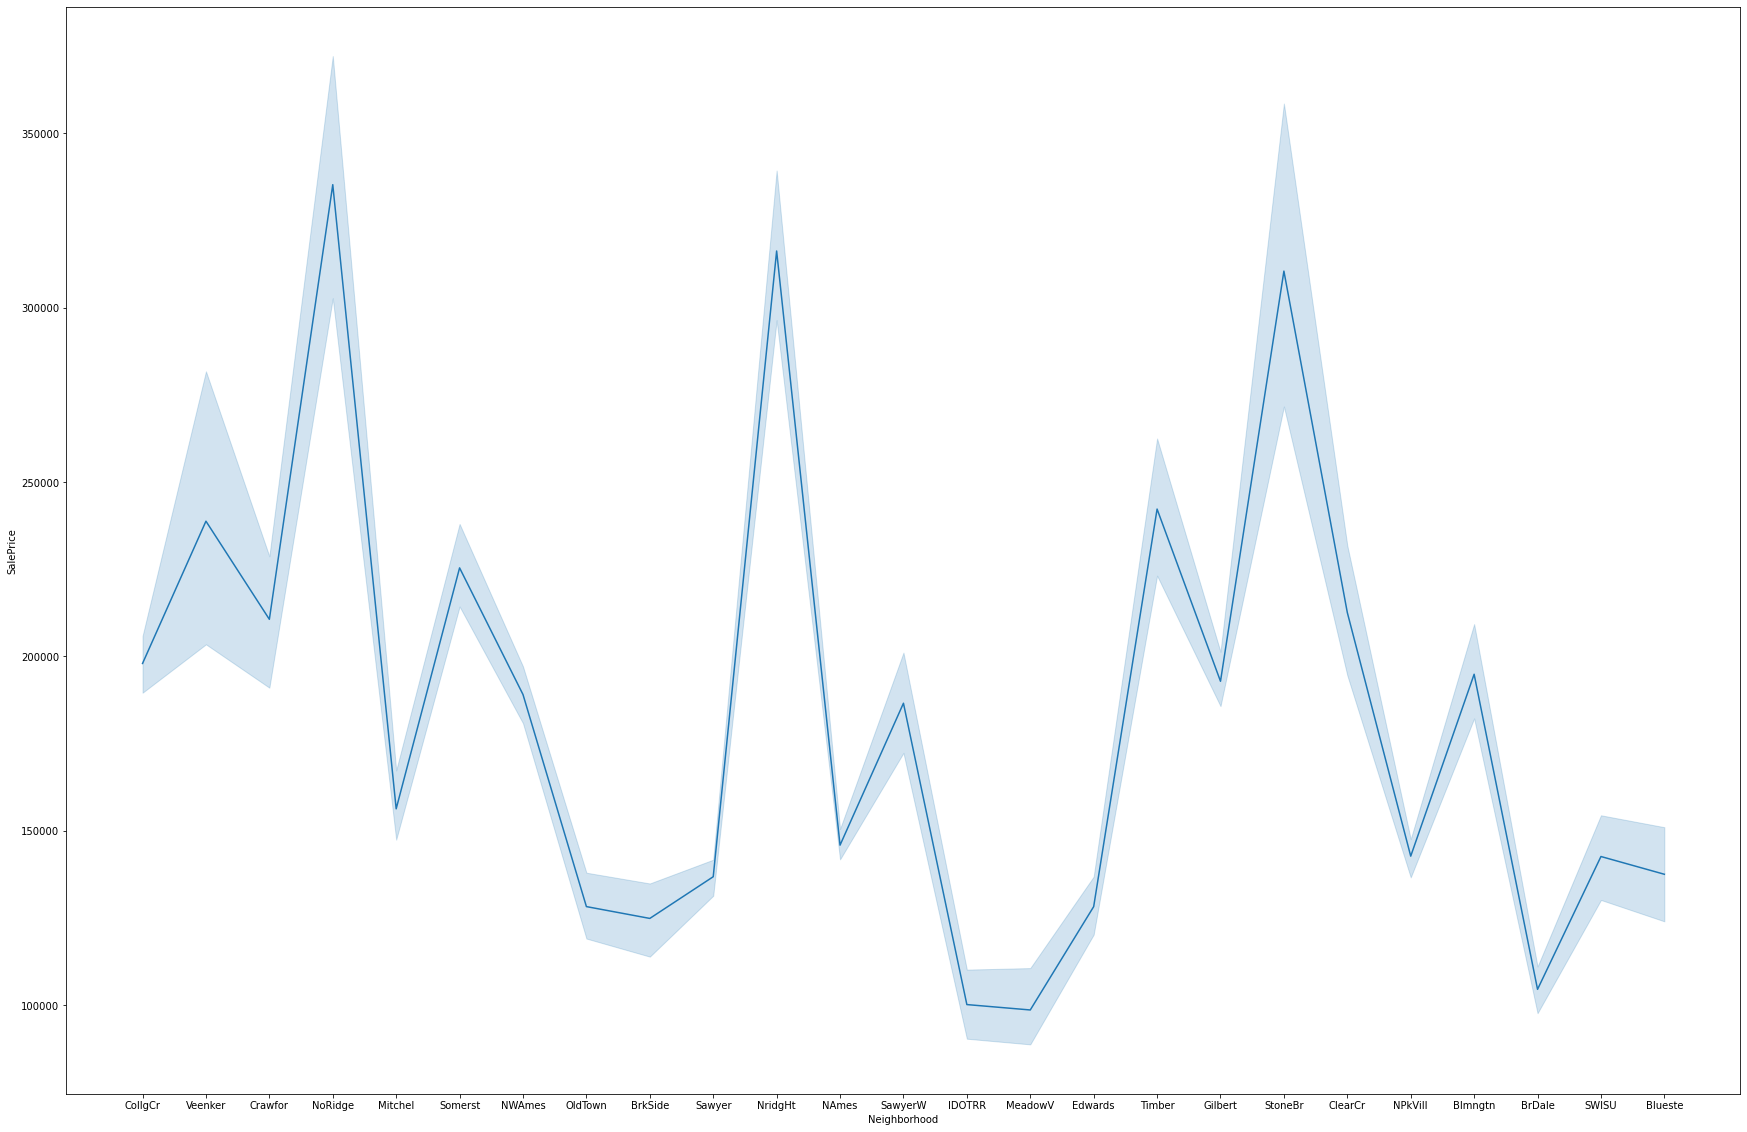

In [46]:
X = plt.figure(figsize=(30,20))
sns.lineplot(x='Neighborhood',y='SalePrice',data = df_train)

In [47]:
cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
        'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold',
        'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train = df_train[cols]
Y_train = df_train[['SalePrice']]

In [48]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0,0,953,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,13175,6,6,1978,1988,119.0,790,163,589,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,9042,7,9,1941,2006,0.0,275,0,877,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,9717,5,6,1950,1996,0.0,49,1029,0,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [49]:
Y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
        'BsmtFullBath','BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
         'GarageCars', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'OpenPorchSF', '3SsnPorch', 
         'PoolArea', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']
X_train[cols] = sc.fit_transform(X_train[cols])

<ipython-input-50-1bdd5496a175>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = sc.fit_transform(X_train[cols])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [51]:
from sklearn.preprocessing import OrdinalEncoder
oc = OrdinalEncoder()
cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual','Functional', 'FireplaceQu', 
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
X_train[cols] = oc.fit_transform(X_train[cols])


<ipython-input-51-517be3870685>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = oc.fit_transform(X_train[cols])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [52]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,2.0,6.0,2.0,5.0,2.0,4.0,4.0,2.0,8.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,2.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,...,3.0,6.0,4.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,...,3.0,2.0,4.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,...,2.0,6.0,2.0,1.0,1.0,4.0,4.0,2.0,8.0,4.0
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,...,2.0,6.0,2.0,1.0,2.0,4.0,4.0,2.0,8.0,4.0


In [53]:
Y_train

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.2, random_state = 5)

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [56]:
pred = reg.predict(X_train)

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,Y_train,squared=False)

32847.21420171264

In [58]:
reg.score(X_train,Y_train)

0.8289241083299392

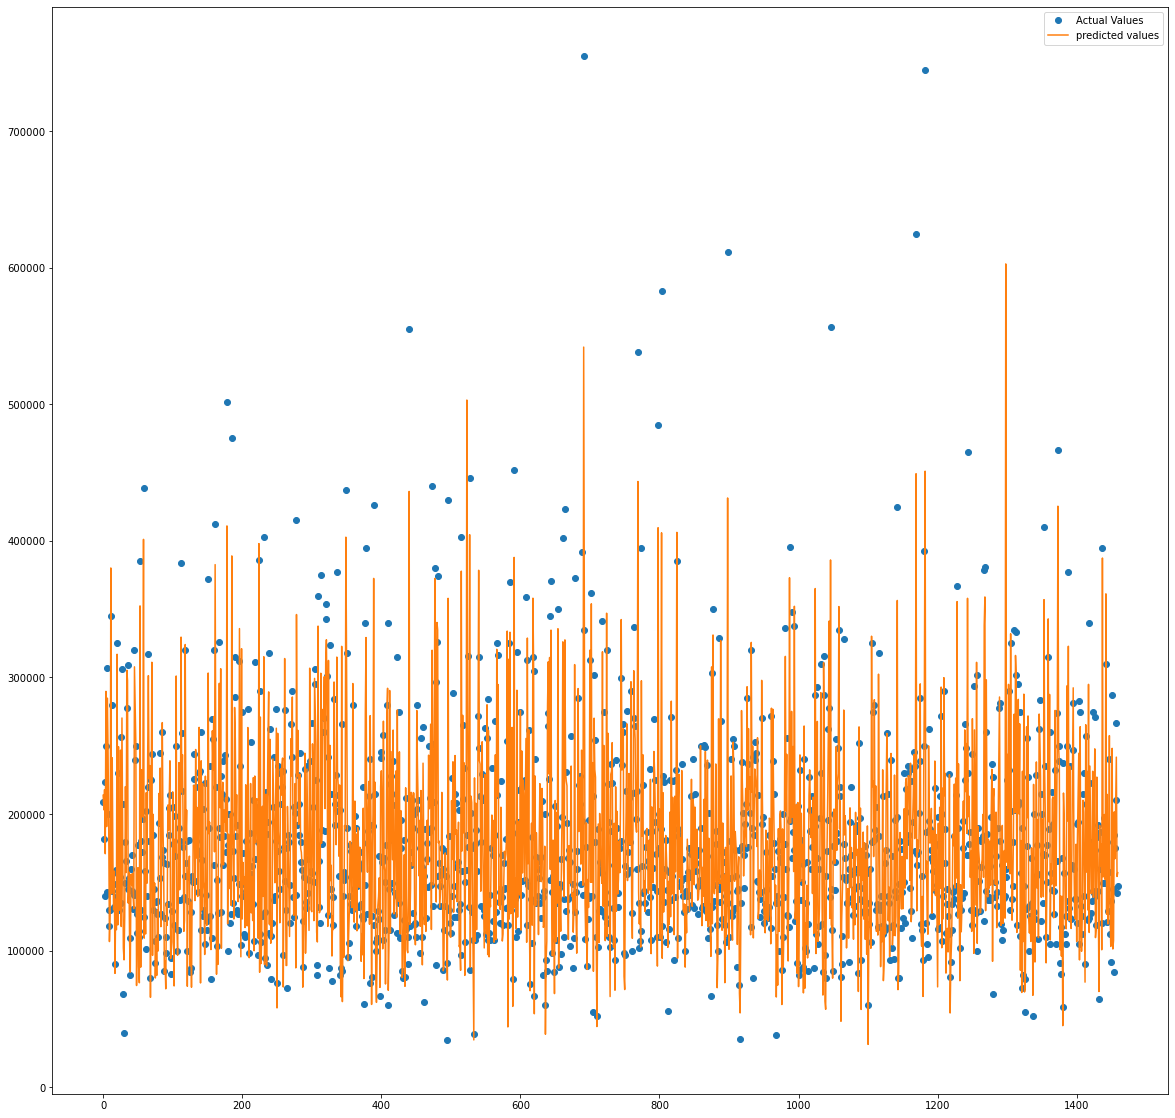

In [59]:
plt.figure(figsize = (20,20))
plt.plot(Y_train, 'o', label = 'Actual Values')
plt.plot(pred, label='predicted values')
plt.legend()

In [60]:
l1 = list(sol)
l2 = list(pred)
data = pd.DataFrame(list(zip(l1,l2)),columns=['Id','SalePrice'])
data

,Id,SalePrice
0,1461,[213772.38604735432]
1,1462,[203093.3238884615]
2,1463,[217910.1076994311]
3,1464,[170959.51591338398]
4,1465,[289843.581269235]
...,...,...
1454,2915,[201580.92131821893]
1455,2916,[167283.52087242698]
1456,2917,[205439.17106284428]
1457,2918,[241681.41501665566]


In [61]:
data['SalePrice'] = data['SalePrice'].astype(float)

In [62]:
data.to_csv('submits.csv',index = False)